# MIS780 Advanced AI For Business - Assignment 2 - T2 2024

## Task Number: House price prediction

**Student Name:** _Jeremiyah Mathew Peter_

**Student ID:** _222632529_

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

The project aims to find the best model to predict the house price in Paris. 10,000 house sales were analysed using linear regression and Multi-layer perceptron (MLP) with different architecture.

Linear regression gave quicker results  but with lesser accuracy and higher error rate.

Multi-layer perceptron (MLP) MLP 3, 2 hidden layers with 80 and 120 nodes, gave the best results with training MAE OF 0.1669 and testing MAE of 0.2011 and correlation of 0.9477. It had the lowest difference between training and testing error rate which showed no signs of overfitting.

MLP 3 is able to capture complex non-linear relationships offering highest accuracy and comparitively similar training and testing error which can be used in real estate problems where new data is applied to get highly accurate results avoiding over-fitting.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing necessary libraries

In [ ]:
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [ ]:
House_price_paris = pd.read_csv("/content/drive/MyDrive/Part1_house_price.csv")

In [ ]:
print('Number of records read: ', House_price_paris.size)

Number of records read:  420000


In [ ]:
# Finding column types
House_price_paris.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [ ]:
# Check for missing values
print(House_price_paris.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Dropping ID column - irrelevant column

In [ ]:
House_price_paris = House_price_paris.drop('id', axis=1)
House_price_paris = House_price_paris.drop('zipcode', axis=1)

Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Select only numerical columns for scaling
numerical_cols = House_price_paris.select_dtypes(include=['number']).columns
hp_numeric = House_price_paris[numerical_cols]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical data
hp_scaled = scaler.fit_transform(hp_numeric)

# Convert the scaled data back to a DataFrame
hp_scaled = pd.DataFrame(hp_scaled, columns=hp_numeric.columns)

# Print the scaled DataFrame
print(hp_scaled)

          price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
0     -0.856606 -0.390322  -1.406116    -0.969417 -0.238366 -0.861032   
1      0.006642 -0.390322   0.233459     0.565472 -0.200252  1.074089   
2     -0.971032 -1.461311  -1.406116    -1.422154 -0.134223 -0.861032   
3      0.186883  0.680667   1.217204    -0.108113 -0.253928 -0.861032   
4     -0.069824 -0.390322  -0.094456    -0.417299 -0.180189 -0.861032   
...         ...       ...        ...          ...       ...       ...   
19995 -0.700670  1.751656   0.561374     0.697980 -0.240593  1.074089   
19996 -0.424845 -0.390322   0.233459    -0.582934 -0.342390  1.074089   
19997 -0.678822 -0.390322   0.561374    -0.505638 -0.222445  1.074089   
19998 -0.433038 -1.461311  -0.750286    -1.168180 -0.343683  1.074089   
19999  0.312370  0.680667   1.873035     0.421921 -0.301523  3.009210   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
0       -0.089519 -0.310836  -0.663849 -0.51

Splitting data into 0.7 and 0.3 portion

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X_hp = hp_scaled.drop('price', axis=1)  # Features (all columns except 'price')
y_hp = hp_scaled['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_hp, y_hp, test_size=0.3, random_state=42)

In [ ]:
print('X train min =', round(X_train.min().min(),4), '; max =', round(X_train.max().max(), 4))
print('X valid min =', round(X_test.min().min(),4), '; max =', round(X_test.max().max(), 4))

X train min = -5.6336 ; max = 39.1617
X valid min = -3.9279 ; max = 23.1432


<a id = "cell_model"></a>
## 3. Predictive Modeling

**Deep learning with sequential model - MLP**

In [ ]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop

In [ ]:
arra_x_train = np.array(X_train)
arra_y_train = np.array(y_train)
arra_x_valid = np.array(X_test)
arra_y_valid = np.array(y_test)

print('Training shape:', arra_x_train.shape)
print('Training samples: ', arra_x_train.shape[0])
print('Validation samples: ', arra_x_valid.shape[0])

Training shape: (14000, 17)
Training samples:  14000
Validation samples:  6000


In [ ]:
def basic_model_3(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(120, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.005, rho=0.9, momentum=0.0, epsilon=1e-07, weight_decay=0.0,),
        metrics=[metrics.mae])
    return(t_model)

In [ ]:
model = basic_model_3(arra_x_train.shape[1], 1) # Since arra_y_train is a 1-d array, we should pass 1 as the second argument to basic_model_1
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 80)                  │           1,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 120)                 │           9,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,281 (44.07 KB)

 Trainable params: 11,281 (44.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(arra_x_train, arra_y_train,
    batch_size=64,
    epochs=500,
    shuffle=True,
    verbose=2,
    validation_data=(arra_x_valid, arra_y_valid))

Epoch 1/500
219/219 - 2s - 9ms/step - loss: 0.3249 - mean_absolute_error: 0.3324 - val_loss: 0.2778 - val_mean_absolute_error: 0.2993
Epoch 2/500
219/219 - 1s - 6ms/step - loss: 0.2338 - mean_absolute_error: 0.2821 - val_loss: 0.2351 - val_mean_absolute_error: 0.2987
Epoch 3/500
219/219 - 1s - 4ms/step - loss: 0.2159 - mean_absolute_error: 0.2676 - val_loss: 0.1926 - val_mean_absolute_error: 0.2556
Epoch 4/500
219/219 - 1s - 4ms/step - loss: 0.1906 - mean_absolute_error: 0.2570 - val_loss: 0.1971 - val_mean_absolute_error: 0.2636
Epoch 5/500
219/219 - 1s - 5ms/step - loss: 0.1911 - mean_absolute_error: 0.2537 - val_loss: 0.1992 - val_mean_absolute_error: 0.2406
Epoch 6/500
219/219 - 1s - 5ms/step - loss: 0.1736 - mean_absolute_error: 0.2508 - val_loss: 0.1500 - val_mean_absolute_error: 0.2287
Epoch 7/500
219/219 - 1s - 3ms/step - loss: 0.1763 - mean_absolute_error: 0.2514 - val_loss: 0.1380 - val_mean_absolute_error: 0.2138
Epoch 8/500
219/219 - 1s - 3ms/step - loss: 0.1706 - mean_abso

In [ ]:
train_score = model.evaluate(arra_x_train, arra_y_train, verbose=0)
valid_score = model.evaluate(arra_x_valid, arra_y_valid, verbose=0)

print('Train MAE: ', (train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val MAE: ', (valid_score[1], 2), ', Val Loss: ', round(valid_score[0])),

Train MAE:  (0.1669679582118988, 2) , Train Loss:  0.06
Val MAE:  (0.20112180709838867, 2) , Val Loss:  0


(None,)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


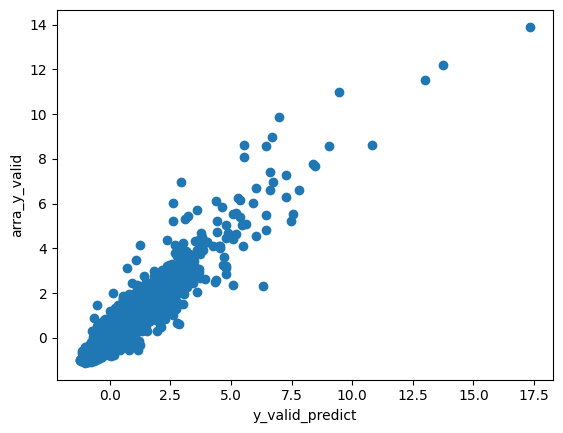

The Correlation between true and predicted values is:  (0.9477787194789169, 3)


In [ ]:
y_valid_predict = model.predict(arra_x_valid)
# plot
plt.scatter(arra_y_valid, y_valid_predict)
plt.ylabel('arra_y_valid')
plt.xlabel('y_valid_predict')
plt.show()

import numpy as np

# Flatten the arrays
arra_y_valid_flat = arra_y_valid.flatten()
y_valid_predict_flat = y_valid_predict.flatten()

# Compute the correlation coefficient between the true and predicted values
corr_result = np.corrcoef(arra_y_valid_flat, y_valid_predict_flat)

# Extract and print the correlation value
print('The Correlation between true and predicted values is: ', (corr_result[0, 1], 3))

In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

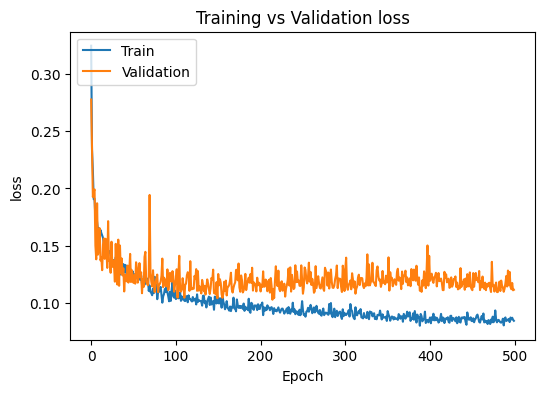

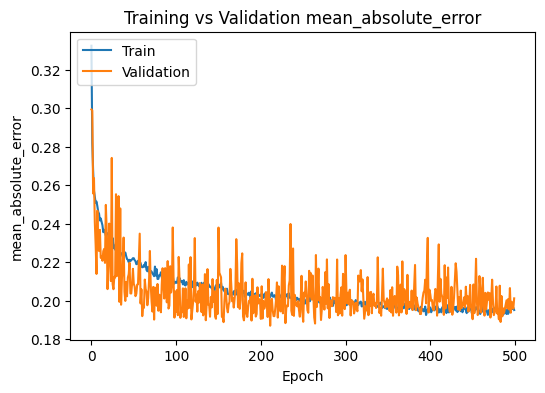

In [ ]:
hist = pd.DataFrame(history.history)

# Plot history
plot_hist(hist, xsize=6, ysize=4)

<a id = "cell_report"></a>
## 4. Experiments Report

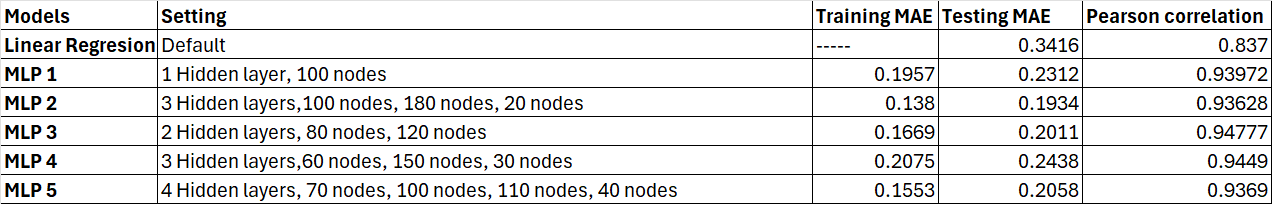

**Best model**

**MLP 3 is the best model as it has relatively lower testing MAE and highest correlation. The difference between training and testing MAE is lower than the differences in other models which shows lesser chance to overfitting. MLP 2 has lowest MAE for both training and testing but low correlation and high difference in MAE in training and testing data which can lead to overfitting in real-world scenarios**


**Justification**

Layer depth: The two hidden layers will allow to capture relationship between features and find complex patterns without over-fitting.

Node configuration: The 80,120 node architecture helps in learning the data capturing complex pattern.

Linear regression had worst results because of its inability to capture non-linear relationships.


**How this model can solve business problem:**

MLP 3 have lowest difference between training and testing MAEs showing less chance for over fitting which is actually needed for real world house prediction solutions, as the new data will be fit to the model with more accurate results. This model can predict house prices with relatively lowest error which would benefit the whole real estate realm, the investors and the buyers. The highest correlation shows the best relationship between true and predicted values.

Linear regression can be trained faster, therefore, it can be used for scenarios which requires quicker estimate. MLP can be used for more accurate results and for bigger dataset as well.